# BBC News Archive Classification

In [26]:
import csv
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [27]:
# Define some global constants and hyper-parameters

vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<oov>"
training_portion = 0.8

In [28]:
# Load the data
news = pd.read_csv('resources/bbc-text.csv')
news.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [29]:
# Check the data structure
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [30]:
# We will do a label encoding on the target
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
news['category'] = encoder.fit_transform(news['category'])

# Check encoding
news['category'].unique()

array([4, 0, 3, 1, 2])

In [31]:
# Perform a train test split
from sklearn.model_selection import train_test_split
features = news['text']
target = news['category']
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2,
                                                                            random_state=101)

In [33]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [40]:
# Now we will build the tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(features_train)
word_index = tokenizer.word_index

# Build the sequences
features_sequences = tokenizer.texts_to_sequences(features_train)
features_padded = pad_sequences(features_sequences, padding=padding_type, maxlen=max_length)

# Check some lengths
print(len(features_sequences[0]))
print(len(features_padded[0]))

718
120


In [41]:
# Build the same tokenizers for validation/test data
validation_sequences = tokenizer.texts_to_sequences(features_test)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

print(len(validation_sequences[0]))
print(len(validation_padded[0]))

333
120


In [43]:
# Now we will build the model and train the Neural Network
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation=tf.nn.relu),
    tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 125       
Total params: 16,533
Trainable params: 16,533
Non-trainable params: 0
_________________________________________________________________


2021-12-13 10:15:11.253743: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [46]:
num_epochs = 30
history = model.fit(features_padded, target_train, epochs=num_epochs, validation_data=(validation_padded, target_test),
          verbose=1)

Epoch 1/30
56/56 [==============================] - 0s 3ms/step - loss: 0.0929 - accuracy: 0.9899 - val_loss: 0.2807 - val_accuracy: 0.9101
Epoch 2/30
56/56 [==============================] - 0s 3ms/step - loss: 0.0863 - accuracy: 0.9916 - val_loss: 0.2761 - val_accuracy: 0.9056
Epoch 3/30
56/56 [==============================] - 0s 3ms/step - loss: 0.0798 - accuracy: 0.9916 - val_loss: 0.2739 - val_accuracy: 0.9056
Epoch 4/30
56/56 [==============================] - 0s 2ms/step - loss: 0.0739 - accuracy: 0.9933 - val_loss: 0.2722 - val_accuracy: 0.8989
Epoch 5/30
56/56 [==============================] - 0s 3ms/step - loss: 0.0691 - accuracy: 0.9933 - val_loss: 0.2708 - val_accuracy: 0.8966
Epoch 6/30
56/56 [==============================] - 0s 2ms/step - loss: 0.0643 - accuracy: 0.9949 - val_loss: 0.2712 - val_accuracy: 0.9034
Epoch 7/30
56/56 [==============================] - 0s 3ms/step - loss: 0.0598 - accuracy: 0.9955 - val_loss: 0.2722 - val_accuracy: 0.9056
Epoch 8/30
56/56 [==

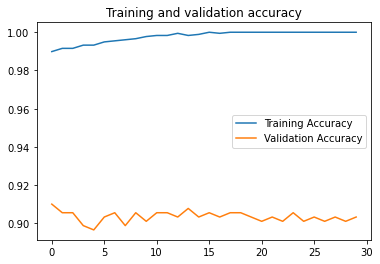

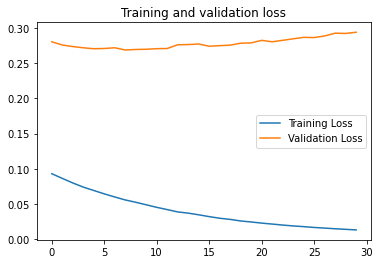

In [47]:
# Evaluate Training Accuracy and Loss

import matplotlib.pyplot as plt

acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs, acc, label='Training Accuracy' )
plt.plot  ( epochs, val_acc, label='Validation Accuracy' )
plt.title ('Training and validation accuracy')
plt.legend()
plt.show()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs, loss, label='Training Loss' )
plt.plot  ( epochs, val_loss, label='Validation Loss' )
plt.title ('Training and validation loss'   )
plt.legend()
plt.show()